In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

haber=pd.read_csv("haberman.csv")#loading datset

In [3]:
print (haber.shape)

(306, 4)


the dataset contains data of 306 patients stored in rows and<br> 4 columns describes the feautres of dataset

In [4]:
print (haber.columns)#columns names in dataset

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [5]:
print(haber[:8])#first 8 rows of the dataset

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1
5   33    58     10       1
6   33    60      0       1
7   34    59      0       2


 here class attribute is status which means survial status.<br>
 status=1 means patient survied 5 or more than 5 years.<br>
 status=2 means died with in 5 years.

In [6]:
haber["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

Data set is imbalanced.<br>
out of 306 patients:<br>
225 survied 5 or more than 5 years and<br>
81 died with in 5 years i.e not survied beyond 5 years.

# 2D SCATTER PLOT

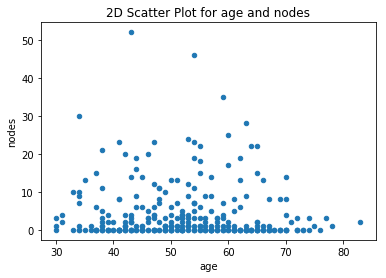

In [7]:
haber.plot(kind="scatter", x="age", y="nodes");
plt.title("2D Scatter Plot for age and nodes")
plt.show()


In the above 2D scatter plot we can say that patients with more than 30 nodes are difficult to survive<br>
i.e Patients having more number of nodes are difficult to survive<br>

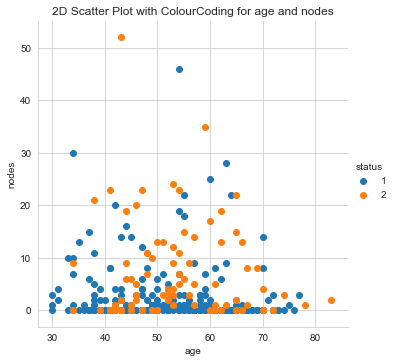

In [8]:
#2D Scatter plot with Colourcoding
sb.set_style("whitegrid")
sb.FacetGrid(haber,hue="status",height=5)\
    .map(plt.scatter,"age","nodes")\
    .add_legend();
plt.title("2D Scatter Plot with ColourCoding for age and nodes")
plt.show();

<b>Observations:</b><br>
1.Almost all the Patients whose age is between 30 and 40 are survived beyond 5 years.<br>
2.Many Patients with more than 20 and 30 nodes are difficult to survive beyond 5 years.

# Pair Plot

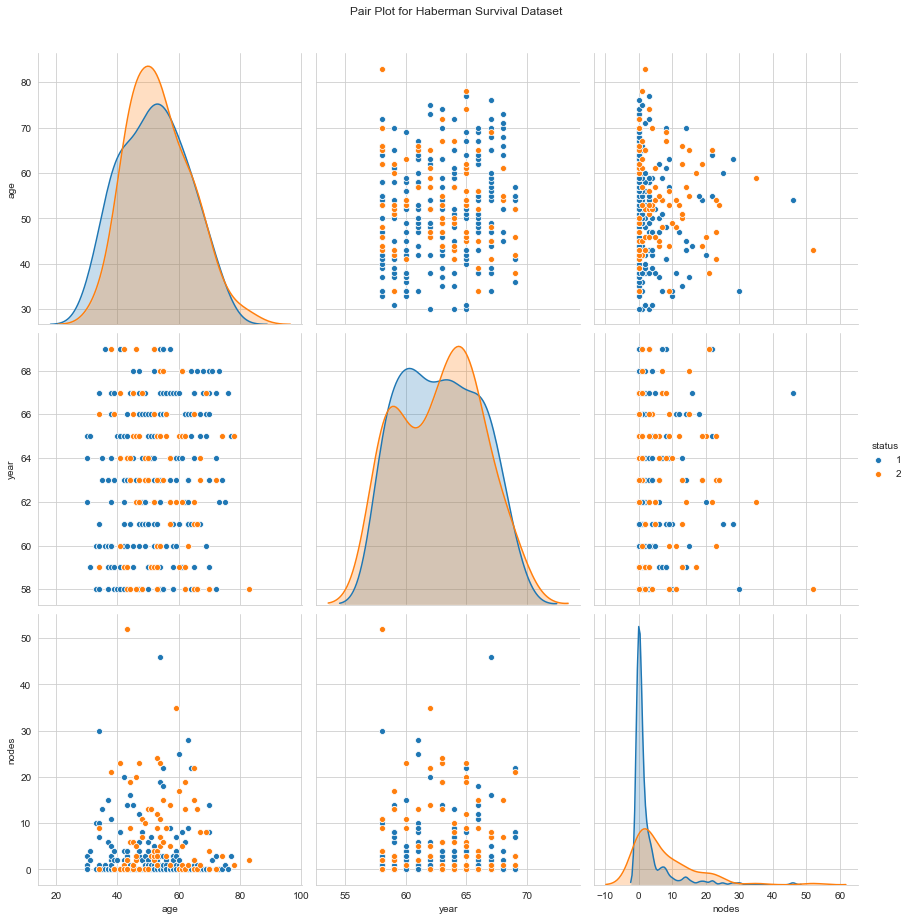

In [9]:
#pairplot for Haberman Survival

plt.close();
sb.set_style("whitegrid");
sb.pairplot(haber, hue='status', height=4).fig.suptitle("Pair Plot for Haberman Survival Dataset",y=1.05);
plt.show()

<b>Observations</b><br>
1.Almost all Patients whose age is less than 38 are survived  beyond 5 years.<br>
2.Patients whose age is above 77 are not survived beyond 5 years.<br>
3.Patients with more than 30 nodes are difficult to survive beyond 5 years.

# Histogram, PDF , CDF

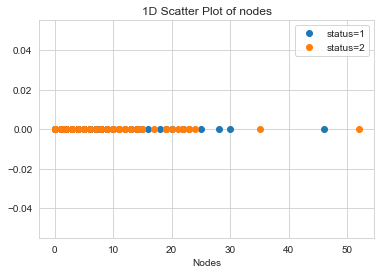

In [10]:
#1D scatter plot of nodes

haber_1=haber.loc[haber["status"]==1];
haber_2=haber.loc[haber["status"]==2];
plt.plot(haber_1["nodes"],np.zeros_like(haber_1["nodes"]),"o",label="status=1");
plt.plot(haber_2["nodes"],np.zeros_like(haber_2["nodes"]),"o",label="status=2");
plt.title("1D Scatter Plot of nodes")
plt.xlabel("Nodes")
plt.legend()
plt.show()

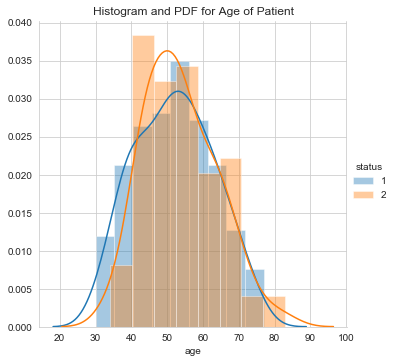

In [11]:
sb.FacetGrid(haber, hue="status",height=5)\
   .map(sb.distplot,"age")\
   .add_legend();
plt.title("Histogram and PDF for Age of Patient")
plt.show();

<b>Observations</b><br>
1.more overlappings occured.<br>
2.patients ages between 30 and 40 have higher chance of survival beyond 5 years.<br>
3.Chances for survival and non-survival is equal between ages 65 and 78. 

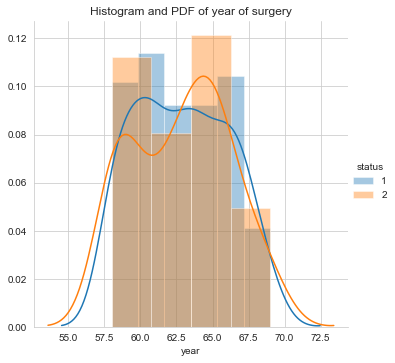

In [12]:
sb.FacetGrid(haber, hue="status", height=5)\
   .map(sb.distplot,"year")\
   .add_legend();
plt.title("Histogram and PDF of year of surgery")
plt.show();

<b>observations:</b><br>
1.more overlappings occured. year of surgery doesnot effect the chance of patient survial.<br>
2.patients survial is high in between 1960 and 1962.<br>
3.in 1965 there was high chance for non survival i.e survial less than 5 years.

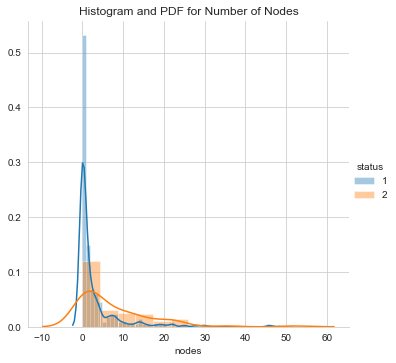

In [13]:
sb.FacetGrid(haber, hue="status", height=5)\
   .map(sb.distplot,"nodes")\
   .add_legend();
plt.title("Histogram and PDF for Number of Nodes")
plt.show();

<b>obeservations:</b><br>
1.From the above plot,we can say number of nodes affects the survival rate more than age and year.<br>
2.Patients with 0 and 1 nodes have high chance for survival.<br>
3.non survival increases after patient having more than 5 nodes.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


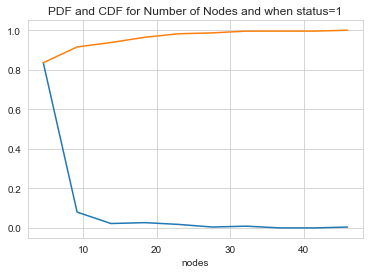

In [14]:
#pdf and cdf of number of nodes

counts,bin_edges=np.histogram(haber_1["nodes"],bins=10,density=True)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("nodes")
plt.title("PDF and CDF for Number of Nodes and when status=1")
plt.show()

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


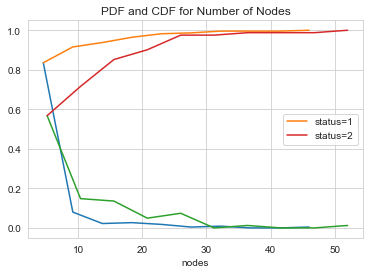

In [15]:
#pdf and cdf of number of nodes when status=1
counts,bin_edges=np.histogram(haber_1["nodes"],bins=10,density=True)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf,label="status=1")

#pdf and cdf of number of nodes when status=2
counts,bin_edges=np.histogram(haber_2["nodes"],bins=10,density=True)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf,label="status=2")
plt.xlabel("nodes")
plt.title("PDF and CDF for Number of Nodes")
plt.legend()
plt.show()

<b>observations:</b><br>
83.5% of patients who survived are having nodes between 0 and 4.6<br>
56.8% of patients who non survived are having nodes between 0 and 5.2

# Mean , Variance and Standard Deviation

In [16]:
#means of number of nodes when status=1 and status=2
print("Means:")
print(np.mean(haber_1["nodes"]))
print(np.mean(haber_2["nodes"]))
  
#standard Deviation of number of nodes when status=1 and status=2
print("\nStandard Deviation:")
print(np.std(haber_1["nodes"]))
print(np.std(haber_2["nodes"]))

Means:
2.7911111111111113
7.45679012345679

Standard Deviation:
5.857258449412131
9.128776076761632


<b>observation</b><br>
There is increase in mean of number of nodes of non survival patients when compared to survival patients<br>
similarlly there is increase in standard deviation also.<br>
so, number of nodes increases there is less chance for survival.

# Median, Percentile, Quantile, IQR ,MAD

In [17]:
#median of number of nodes when status=1 and status=2

print("\nMedians:")
print(np.median(haber_1["nodes"]))
print(np.median(haber_2["nodes"]))

#90th percentile of number of nodes when status=1 and status=2

print("\n90th Percentile:")
print(np.percentile(haber_1["nodes"],90))
print(np.percentile(haber_2["nodes"],90))

#quantile of number of nodes when status=1 and status=2

print("\nQuantile:")
print(np.percentile(haber_1["nodes"],np.arange(0,100,25)))
print(np.percentile(haber_2["nodes"],np.arange(0,100,25)))

#median absolute deviation of number of nodes when status=1 and status=2

from statsmodels import robust
print("\nMedian Absolute Deviation:")
print(robust.mad(haber_1["nodes"]))
print(robust.mad(haber_2["nodes"]))



Medians:
0.0
4.0

90th Percentile:
8.0
20.0

Quantile:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

Median Absolute Deviation:
0.0
5.930408874022408


<b>observations</b><br>
1.Median of nodes is high for non survival dataset compared to survival dataset.<br>
2.similarlly,The percentile quartile is high for non survival dataset than survival dataset.<br>
3.75% of non survival patients have 11 or more nodes where as 75% of survied patients have only 3 nodes.

# BoxPlot and Whiskers

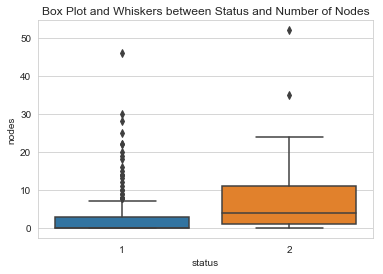

In [18]:
sb.boxplot(x="status", y="nodes", data=haber)
plt.title("Box Plot and Whiskers between Status and Number of Nodes")
plt.show()

# Violin Plots

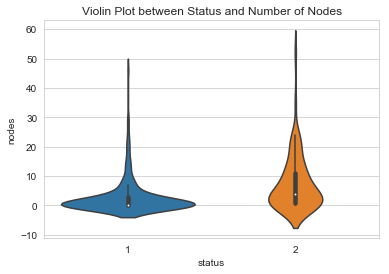

In [19]:
sb.violinplot(x="status", y="nodes", data=haber)
plt.title("Violin Plot between Status and Number of Nodes")
plt.show()

<b>observations:</b><br>
1.There are many patients who survived having 0 nodes and at the same time there are some patients having 0 nodes survived less than 5 years<br>
2.The increase in nodes number there is decrease in survival rate    i.e patients with more than 1 node have less chance of survival

# Multivariate Analysis and Contour Plot

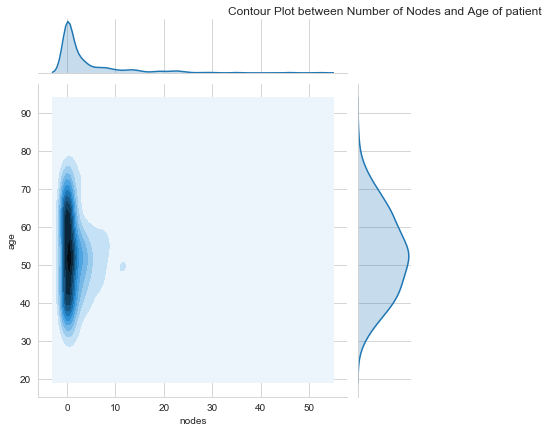

In [20]:
sb.jointplot(x="nodes", y="age", data=haber, kind="kde")
plt.title("Contour Plot between Number of Nodes and Age of patient",y=1.2)
plt.show()

<b>observations</b><br>
Most patients with 0 and 1 nodes are in between ages 45 and 55.

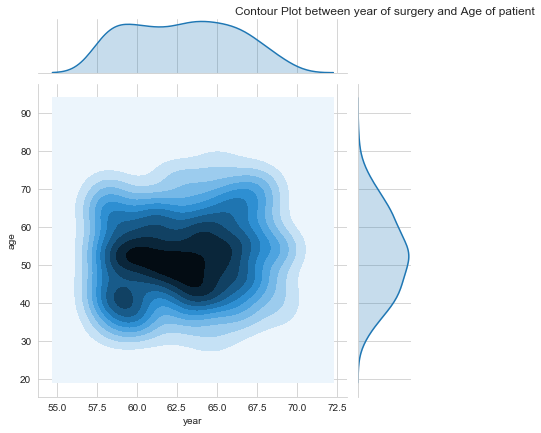

In [21]:
sb.jointplot(x="year", y="age", data=haber,kind="kde")
plt.title("Contour Plot between year of surgery and Age of patient",y=1.2)
plt.show()

<b>observations</b><br>
From 1960-1964 ,more surgeries done on patients between ages 45 and 55.

<b>Conclusions:</b><br>
1.Patient's Age and Year of surgeory are not the deciding features for their survival<br>
    but a patients whose age is less than 35 have high chance of survival.<br>
2.Chance of survival depends on number of nodes in a patient.<br>
    patient with less number of nodes have higher chance for survival.<br>
3.Absence of nodes in patients doesn't guarantee the survival of the Patient.